## Лабораторная работа №1 | Вариант 2

Выполнил: Бракжин Ярослав

# Произошла вопиющая ошибка 

Если вкратце, то сердце заподозрило что-то неладное. Так и оказалось. Я загрузил вторую домашку и решил проверить остальные. И когда зашел в первую (эту). То увидел пустоту. Сохранить то я сохранил, но из локалки jupyter не скинул. И просто initial ноутбук отправил. Ниже ссылка, как док-во. Не накахывайте :)

Ссылка на скриншот для пущей достоверности.
https://drive.google.com/drive/folders/1_QSnbtyn-mKQg8ptIrQp12zigU97wawN?usp=sharing

### 1. Numpy

In [2]:
import numpy as np

1. Создайте матрицу размером 8х8 и заполните ее шахматным рисунком

In [15]:
# Можно через срезы, можно через индексы, можно попробовать с помощью tile()
chessboard = np.zeros((8, 8))

chessboard[1::2, ::2] = 1
chessboard[::2, 1::2] = 1

print(chessboard.astype(int))

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


2. Каков результат выполнения следующих выражений?

```python
np.array(0) / np.array(0)
np.array(0) // np.array(0)
np.array([np.nan]).astype(int).astype(float)
```

In [16]:
np.array(0) / np.array(0) 
# warning: invalid value encountered in divide
# result: np.float64(nan)

C:\Users\Crowdlless\AppData\Local\Temp\ipykernel_12292\3085791999.py:1: RuntimeWarning: invalid value encountered in divide
  np.array(0) / np.array(0) #warning: invalid value encountered in divide


np.float64(nan)

In [6]:
np.array(0) // np.array(0)
# warning: invalid value encountered in floor_divide
# result: np.int64(0)

C:\Users\Crowdlless\AppData\Local\Temp\ipykernel_12292\2018018105.py:1: RuntimeWarning: divide by zero encountered in floor_divide
  np.array(0) // np.array(0)


np.int64(0)

In [7]:
np.array([np.nan]).astype(int).astype(float)
# warning: invalid value encountered in cast
# result: array([-9.22337204e+18])

C:\Users\Crowdlless\AppData\Local\Temp\ipykernel_12292\699728972.py:1: RuntimeWarning: invalid value encountered in cast
  np.array([np.nan]).astype(int).astype(float)


array([-9.22337204e+18])

3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [8]:
tile = np.array([[0, 1], [1, 0]])

chessboard = np.tile(tile, (4,4))

print(chessboard)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Как округлить до целых массив чисел с плавающей точкой?

In [23]:
# с помощью astype()
arr = np.array([2,2], dtype=float)
print(arr)
print(arr.astype(int))

[2. 2.]
[2 2]


5. Как найти общие значения между двумя массивами?

In [26]:
# с помощью intersect_()
arr1 = np.array([0,2,4])
arr2 = np.array([5,2,1])

middle_value = np.intersect1d(arr1, arr2)

print(middle_value)

[2]


6. Как вычислить ((A+B)*(-A/2)) на месте (без копирования)?

In [38]:
# ((A+B)*(-A/2))
# Можно попробовать в 3 операции +=, /=, *=
A = np.array([1,2,3], dtype=float)
B = np.array([3,2,1], dtype=float)

# 1. B += A
B += A

# 2. A /= (-2)
A /= -2.

# 3. A *= B
A *= B

# print(A.astype(int))
print(A)


[-2. -4. -6.]


7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [50]:
# решим поставленную задачу через формулу _корень суммы квадратов_ двух векторов
coord = np.random.randint(1, 10, (100, 2))

print(coord)

# broadcasting
coord_1 = coord[np.newaxis, :, :]
coord_2 = coord[:, np.newaxis, :]

diff = coord_1 - coord_2
sqr = diff ** 2
sum = np.sum(sqr, axis=-1)
sqrt = np.sqrt(sum)

print(sqrt)

[[10 10]]
[[0.]]


8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [30]:
# 1. Чистого способа нет.
# 2. Можно попытаться через view() и copyto(), но это не изменит dtype.
# 3. Рекомендуемый способ astype(), несмотря на то что он делает копию, хоть и очень быстро // arr = arr.astype(int)

arr = np.array([2,2], dtype=float)
print(arr)
arr = arr.astype(int)
print(arr)

[2. 2.]
[2 2]


9. Создайте структурированный массив, представляющий позицию (x, y) и цвет (r, g, b).

In [55]:
color_point_type = np.dtype([("position", float, 2), ("color", np.uint8, 3)])

color_points = np.array([
     ((1., 3.), (10, 255, 123)), 
     ((3., 1.), (123, 255, 10))
    ], dtype=color_point_type)

print(color_points)
print(color_points["color"]) # Все цвета
print(color_points[1]) # Второй color point
print(color_points[1]["color"][2]) # третяя компонента rgB второго color point

[([1., 3.], [ 10, 255, 123]) ([3., 1.], [123, 255,  10])]
[[ 10 255 123]
 [123 255  10]]
([3.0, 1.0], [123, 255,  10])
10


10. Какой эквивалент enumerate для numpy массивов?

In [28]:
# ndenumerate() - эквивалент, также есть ndindex() для получения индексов
for idx, value in np.ndenumerate([10, 2, 30, 4, 50]):
    print(idx, value)

(0,) 10
(1,) 2
(2,) 30
(3,) 4
(4,) 50


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Данные о преступлениях, совершенных женщинами в Индии, с демографическими подробностями.

Файл: `CrimesOnWomenData.csv`

```
State - название штата/региона
Year - год записи
Rape - случаи изнасилования
K&A - случаи похищения 
DD - смерти из-за приданого
AoW - нападение на женщин
AoM - нападение на женскую скромность(modestity)
DV - бытовое насилие
WT - торговля женщинами
```

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('CrimesOnWomenData.csv') # В tree должен быть этот файл

In [91]:
print(df)

     Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  \
0             0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   
1             1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   
2             2              ASSAM  2001   817  1070   59   850     4  1248   
3             3              BIHAR  2001   888   518  859   562    21  1558   
4             4       CHHATTISGARH  2001   959   171   70  1763   161   840   
..          ...                ...   ...   ...   ...  ...   ...   ...   ...   
731         731         D&N Haveli  2021  1250  4083  141  2068   417  4731   
732         732        Daman & Diu  2021   315   904   16  1851    10   501   
733         733           Delhi UT  2021     2     1    0     5     1     9   
734         734        Lakshadweep  2021     0     0    0     1     1     3   
735         735         Puducherry  2021     2     0    2    31     3    12   

     WT  
0     7  
1     0  
2     0  
3    83  
4

1. За какие года представлен набор данных?

In [72]:
df['Year'].drop_duplicates()

0      2001
34     2002
68     2003
102    2004
136    2005
170    2006
204    2007
238    2008
272    2009
306    2010
340    2011
376    2012
412    2013
448    2014
484    2015
520    2016
556    2017
592    2018
628    2019
664    2020
700    2021
Name: Year, dtype: int64

2. Выявите район с самым высоким количеством убийств женщин

In [4]:
# Сл. район при условии, что за убийства считаются только DD
df[['State', 'DD']].assign(State=df['State'].str.title()).sort_values(by='DD', ascending=False).head(1)

,State,DD
582,Uttar Pradesh,2524


3. Какое среднее число изнасилований женщин в индии наблюдалось в указанные года?

In [92]:
df['Rape'].mean()

np.float64(727.8559782608696)

4. Выявите район с минимальным числом похищений за период 2001-2003 года

In [140]:
# 1. Выборка в 2001-2003. Берем сл. поля: район и число похищений
# 2. Делаем группировку по району, суммируем число похищений
# 3. Сортировка от меньшего к большему
# 4. По условию выявить только один район, т.е. самый первый после сортировки (чтоб найти все регионы, то нужно через поиск минимального)
df[df['Year'].isin([2001, 2002, 2003])][['State', 'K&A']] \
.assign(State=df['State'].str.title()) \
.groupby('State')[['K&A']].sum() \
.sort_values(by='K&A') \
.head(1)

,K&A
State,
Lakshadweep,0


5. Перечислите районы в которых наблюдались наиболее частые случае домашнего насилия за период с 2005 по 2012 года

In [155]:
domestic_violence = df[((df['Year'] > 2004) & (df['Year'] < 2013))][['State', 'DV']] \
.assign(State=df['State'].str.title()) \
.groupby('State')[['DV']].sum() \
.sort_values(by='DV', ascending=False)

dv_max = domestic_violence['DV'].max()
print(domestic_violence[domestic_violence['DV'] == dv_max])

# Если нужны наиболее частые, то
print(domestic_violence.head(5))

                 DV
State              
West Bengal  111458
                    DV
State                 
West Bengal     111458
Andhra Pradesh   89643
Rajasthan        76364
Maharashtra      57822
Uttar Pradesh    56997


6. Выведите названия районов в порядке не возрастания случаев торговли женщинами за 2020 год

In [139]:
df[df['Year'] == 2020][['State', 'WT']] \
.assign(State=df['State'].str.title()) \
.groupby('State')[['WT']].sum() \
.sort_values(by='WT', ascending=False)

,WT
State,
Sikkim,231
Jharkhand,159
Madhya Pradesh,85
Punjab,67
Uttarakhand,52
Andhra Pradesh,48
Gujarat,47
Bihar,30
Haryana,28


Перейдем к следующему набору данных.

Файл: `CustomerPurchasingBehaviors.csv`

Этот набор данных содержит информацию о профилях клиентов и их покупательском поведении. Данные содержат столбцы, содержащие идентификатор пользователя, возраст, годовой доход, сумму покупки, показатель лояльности (в разбивке по классам), регион и частоту покупок. Он предназначен для анализа тенденций сегментации клиентов и лояльности и может быть использован для различных задач машинного обучения и анализа данных, связанных с поведением клиентов и исследованиями рынка.

```
user_id - ID клиента
age - Возраст
annual_income - Годовой доход клиента (в долларах США).
purchase_amount - Общая сумма покупок, совершенных клиентом (в долларах США).
loyalty_score - Показатель лояльности клиента (значение от 0 до 100).
region - Регион, в котором проживает клиент (Север, Юг, Восток, Запад).
purchase_frequency - Частота покупок клиентов (количество раз в год).
```

In [7]:
df = pd.read_csv('CustomerPurchasingBehaviors.csv')

In [8]:
print(df)

     user_id  age  annual_income  purchase_amount  loyalty_score region  \
0          1   25          45000              200            4.5  North   
1          2   34          55000              350            7.0  South   
2          3   45          65000              500            8.0   West   
3          4   22          30000              150            3.0   East   
4          5   29          47000              220            4.8  North   
..       ...  ...            ...              ...            ...    ...   
233      234   40          60000              450            7.2   West   
234      235   38          59000              430            6.9  North   
235      236   54          74000              630            9.4  South   
236      237   32          52000              360            5.8   West   
237      238   31          51000              340            5.6  North   

     purchase_frequency  
0                    12  
1                    18  
2                    

8. Какой средний годовой доход у клиентов с уровнем лояльности больше 50 живущих на севере

In [11]:
df[((df['region'] == 'North') & (df['loyalty_score'] > 5))]['annual_income'].mean()

np.float64(60146.34146341463)

9. Выведите 25 и 75 перцентили уровня лоальности клиентов живущих на западе с частотой покупок более 20 раз в год

In [13]:
df[((df['region'] == 'West') & (df['purchase_frequency'] > 20))]['loyalty_score'].quantile([0.25, 0.75])

0.25    8.5
0.75    9.2
Name: loyalty_score, dtype: float64

10. Отличается ли медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера.

In [41]:
# Задача поставлена не корректно. Во-первых, не совсем понятно, что конкретно разделяет выборку: уровень лояльности (1) или место проживания (2). 
# Если это все-таки выборка, то мин. уровень лояльности состовляет 3.0, что как я понимаю равно 30. Если я где-то не прав, прошу поправить. 
# Ниже приведены оба случая. Случай (1) закомментирован из-за того, что медианное значение не получется посчитать NaN.
# P.S. Это ни в коем случае не придирка, просто хочу исправить возможную неточность, как мне показалось.

In [ ]:
# high_ls_median_age = df[((df['region'].isin(['East', 'North'])) & (df['loyalty_score'] > 7))]['age'].median() # ls mean loyalty score
# low_ls_median_age = df[((df['region'].isin(['East', 'North'])) & (df['loyalty_score'] < 1))]['age'].median()

# print(f'Медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера{"" if high_ls_median_age != low_ls_median_age else " НЕ"} ОТЛИЧАЕТСЯ')
# print(f'Для низкой лояльности: {low_ls_median_age} и для высокой: {high_ls_median_age}')

In [ ]:
east_median_age = df[((df['region'] == 'East') & ((df['loyalty_score'] > 7) | (df['loyalty_score'] < 1)))]['age'].median() # ls mean loyalty score
north_median_age = df[((df['region'] == 'North') & ((df['loyalty_score'] > 7) | (df['loyalty_score'] < 1)))]['age'].median()

print(f'Медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера{"" if east_median_age != north_median_age else " НЕ"} ОТЛИЧАЕТСЯ')
print(f'Для клиентов проживающих на Востоке: {east_median_age} и на Севере: {north_median_age}')

In [40]:
# Для проверки значений макс./мин. уровня лояльности
# df['loyalty_score'].max()
# df['loyalty_score'].min()

Медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера ОТЛИЧАЕТСЯ
Для клиентов проживающих на Востоке: 40.0 и на Севере: 46.0


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [6]:
import matplotlib.pyplot as plt

1. Постройте диаграмму которая отражает средний уровень лояльности во всех регионах

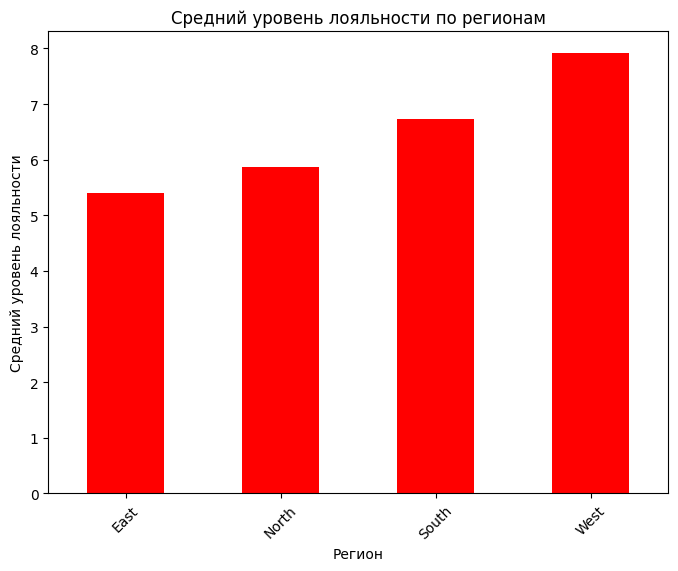

In [46]:
plt.figure(figsize=(8, 6))
avg_loyalty_by_region = df.groupby('region')['loyalty_score'].mean()
avg_loyalty_by_region.plot(kind='bar', color='red')
plt.title('Средний уровень лояльности по регионам')
plt.xlabel('Регион')
plt.ylabel('Средний уровень лояльности')
plt.xticks(rotation=45)
plt.show()

2. Постройте гистограмму распределения зарплат клиентов на Севере.

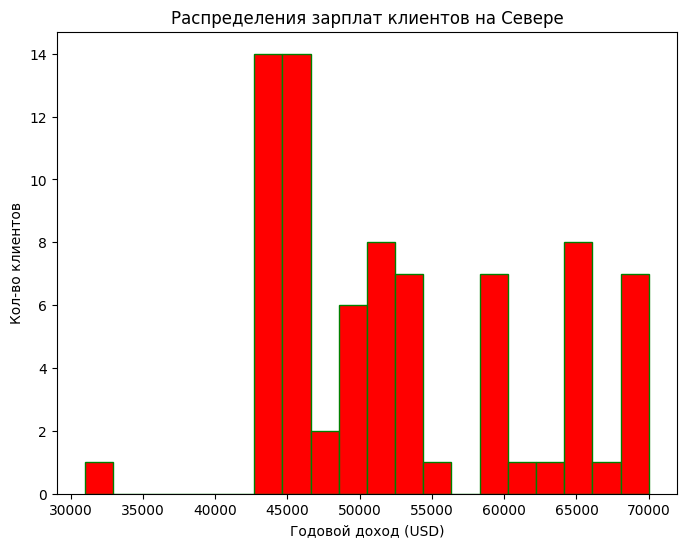

In [49]:
plt.figure(figsize=(8, 6))
north_customers = df[df['region'] == 'North']
plt.hist(north_customers['annual_income'], bins=20, color='red', edgecolor='green')
plt.title('Распределения зарплат клиентов на Севере')
plt.xlabel('Годовой доход (USD)')
plt.ylabel('Кол-во клиентов')
plt.show()

3. Сравните уровни зарплат людей на севере и юге.

In [50]:
import seaborn as sns

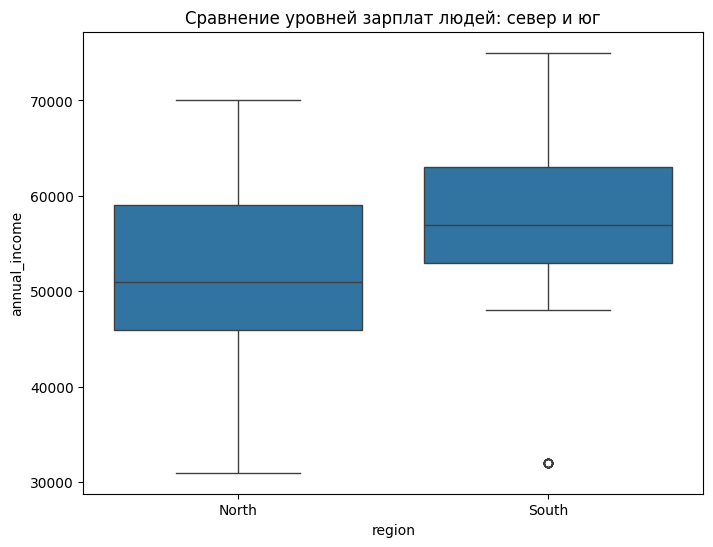

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='annual_income', data=df[df['region'].isin(['North', 'South'])])
plt.title('Сравнение уровней зарплат людей: север и юг')
plt.show()

4. Постройте box plot отображающий распределение уровня лояльности для людей до 20 лет, от 20 до 40, от 40 до 60 и старше 60 лет

In [11]:
max_age = df['age'].max()
max_age = max_age if max_age > 60 else 61

age_bins = [0, 20, 40, 60, max_age]
age_labels = ['<20', '20-40', '40-60', '>60']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='loyalty_score', data=df)
plt.title('Распределение уровня лояльности по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Показатель лояльности')
plt.show()

np.int64(22)

5. Визуализируйте зависимость частоты покупок от заработка

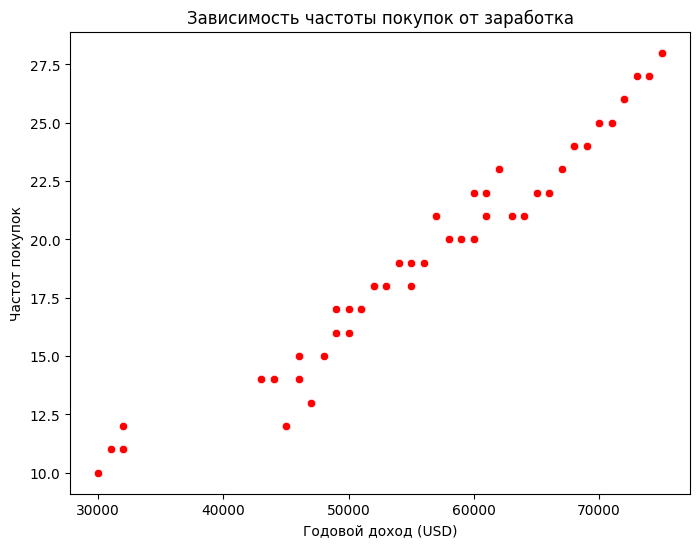

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual_income', y='purchase_frequency', data=df, color='red')
plt.title('Зависимость частоты покупок от заработка')
plt.xlabel('Годовой доход (USD)')
plt.ylabel('Частот покупок')
plt.show()

6. Визуализируйте как зависит сумма покупок от зарплаты клиента

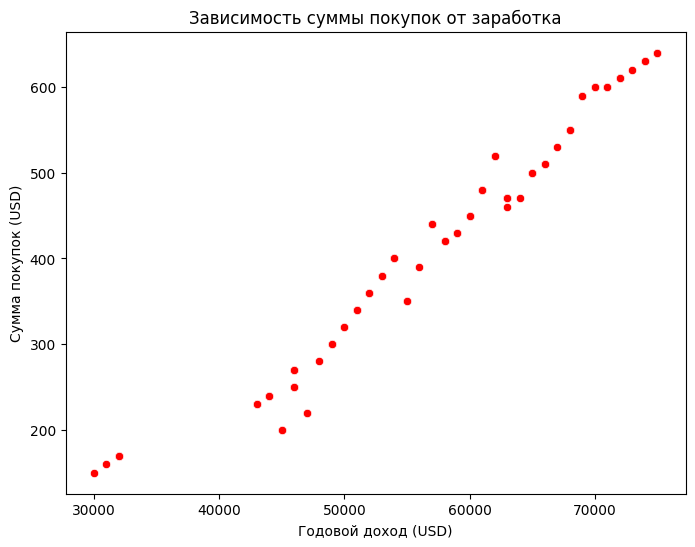

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual_income', y='purchase_amount', data=df, color='red')
plt.title('Зависимость суммы покупок от заработка')
plt.xlabel('Годовой доход (USD)')
plt.ylabel('Сумма покупок (USD)')
plt.show()

7. Придумайте как визуализировать зависимость между частотой покупок, суммой покупок и скором лояльности *

\* Задание на доп. балл

In [12]:
from mpl_toolkits.mplot3d import Axes3D

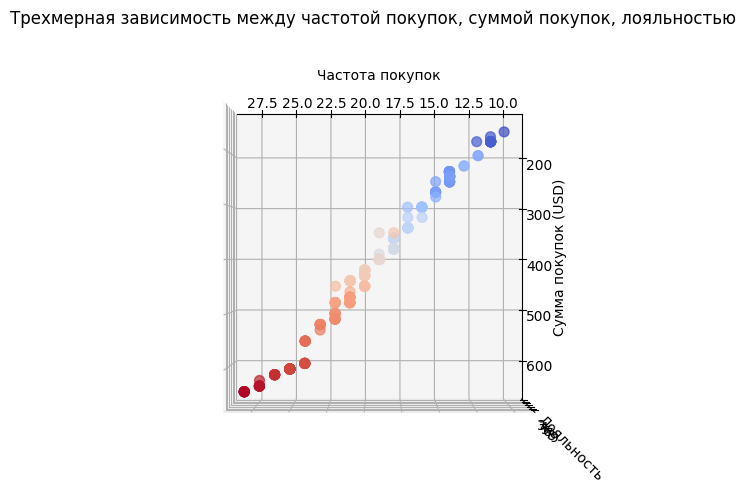

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['purchase_frequency'], df['purchase_amount'], df['loyalty_score'], c=df['loyalty_score'], cmap='coolwarm', s=50, alpha=0.7)

ax.set_title('Трехмерная зависимость между частотой покупок, суммой покупок, лояльностью')

ax.set_xlabel('Частота покупок')
ax.set_ylabel('Сумма покупок (USD)')
ax.set_zlabel('Лояльность')

ax.view_init(elev=90, azim=90)
# ax.view_init(elev=0, azim=90)

plt.show()

# P.S. как оказалось можно и в 2D, цвет отлично выражает 3 ось
# Лояльность выражается через цвет